In [1]:
%run auxiliary.ipynb

In [2]:
all_df = pd.read_csv('all_releases_no_repetitions.csv')

scaler = MinMaxScaler()

X_features = ['CBO','CC','DIT','LCOM','LOC','NOC','RFC','WMC']#'MI','class_frequency','number_of_changes','change_probability']

all_df_original = all_df

all_df = all_df.drop(['Path','class_frequency','number_of_changes','change_probability'], axis=1)

all_df[X_features] = scaler.fit_transform(all_df[X_features])

X = all_df.loc[:, X_features]

Y = all_df.will_change

In [3]:
wo_outliers_df = pd.DataFrame()

In [4]:
only_1_df = all_df[all_df.will_change == 1]
only_0_df = all_df[all_df.will_change == 0]

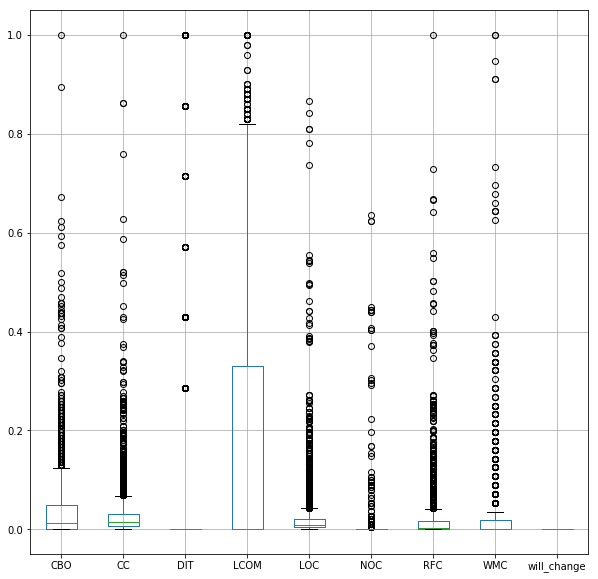

In [5]:
boxplot_caps = only_0_df.boxplot(figsize=(10, 10), return_type='dict')['caps']

In [6]:
boxplot_max_list = list()
for i in range(1,16,2):
    boxplot_max_list.append(boxplot_caps[i].get_ydata()[0])

In [7]:
outliers_index_list = outliers_counter(only_0_df)

In [8]:
outliers_index_list.__len__()

234

In [9]:
only_0_df = only_0_df.drop(outliers_index_list)

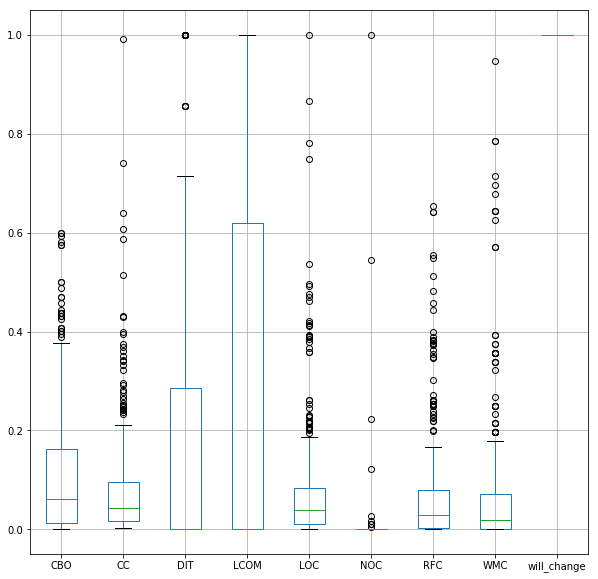

In [10]:
boxplot_caps = only_1_df.boxplot(figsize=(10, 10), return_type='dict')['caps']

In [11]:
boxplot_max_list = list()
for i in range(1,16,2):
    boxplot_max_list.append(boxplot_caps[i].get_ydata()[0])

In [14]:
outliers_index_list = outliers_counter(only_1_df)

In [15]:
outliers_index_list.__len__()

25

In [16]:
only_1_df = only_1_df.drop(outliers_index_list)

In [17]:
wo_outliers_df = wo_outliers_df.append([only_0_df, only_1_df])

will_change
0    3637
1     287
Name: will_change, dtype: int64

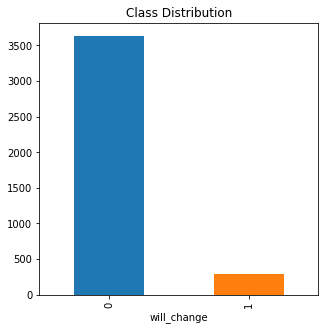

In [18]:
ax = wo_outliers_df.groupby(['will_change'])['will_change'].count().plot.bar(title="Class Distribution", figsize=(5,5))

wo_outliers_df.groupby(['will_change'])['will_change'].count()

In [ ]:
wo_outliers_df.to_csv('wo_outliers.csv')